```
§1 Machine Learning Fundamentals with Python

§1.1 Supervised Learning with scikit-learn

§1.1.3 Fine-tuning your model
```

#### How good is your model?

**1. Why is accuracy not always a useful metric for measuring model performance?**

> * The accuracy is the fraction of correctly classified samples. *It is not always a useful metric.*
> 
> * The spam classification, a class imbalance example, could build a classifier that predicts all emails as real, with 99% accuracy. It sounds great, but it is horrible at actually classifying spam because using accuracy fails at its original purpose.
> 
> * Thus, more nuanced metrics are in need.

**2. When diagnosing classification predictions, what is the confusion matrix in the email spam example?**

> ![Confusion matrix](ref1.%20Confusion%20matrix.jpg)

**3. What are the metrics from the confusion matrix?**

> * Accuracy: $\frac{tp + tn}{tp + tn + fp + fn}$
> 
> * Precision: $\frac{tp}{tp + fp}$
> 
> * Recall: $\frac{tp}{tp + fn}$
> 
> * F1score: $2 \cdot \frac{precision \cdot recall}{precision + recall}$
> 
> * High precision: not many real emails predicted as spam
> 
> * High recall: predicted most spam emails correctly

**4. Code of confusion matrix in scikit-learn:**

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
vote = pd.read_csv('ref2. US Congressional Voting Records (1984).csv',
                   header=None)
vote.replace(['?', 'n', 'y', 'republican', 'democrat'], [0, -1, 1, 0, 1],
             inplace=True)
X = vote.iloc[:, 1:]
y = vote.iloc[:, 0]
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 56   3]
 [  7 108]]


In [2]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.97      0.94      0.96       115

    accuracy                           0.94       174
   macro avg       0.93      0.94      0.94       174
weighted avg       0.94      0.94      0.94       174



#### Logistic regression and the ROC curve

**1. How does logistic regression work for binary classification?**

> * Logistic regression outputs probabilities.
> 
> * If the probability 'p' is greater than 0.5:
> 
>     * the data is labeled '1'
> 
> * If the probability 'p' is less than 0.5:
> 
>     * the data is labeled '0'

**2. Code of logistic regression in scikit-learn:**

In [3]:
import pandas as pd
import numpy as np
vote = pd.read_csv('ref2. US Congressional Voting Records (1984).csv',
                   header=None)
vote.replace(['?', 'n', 'y', 'republican', 'democrat'], [0, -1, 1, 0, 1],
             inplace=True)
X = vote.iloc[:, 1:]
y = vote.iloc[:, 0]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
np.unique(y_pred)

array([0, 1])

**3. How to set probability thresholds?**

> * By default, logistic regression threshold = 0.5.
> 
> * Probability thresholds are not specific of logistic regression, k-NN classifiers also have thresholds.

**4. Code of plotting the Receiver Operating Characteristic (ROC) curve:**

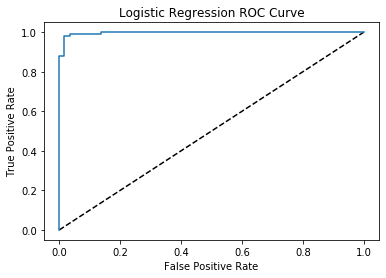

In [4]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#### Area under the ROC curve

**1. What does the area under the ROC curve (AUC) mean?**

> * The larger area under the ROC curve = *better model*

**2. Code of AUC in scikit-learn:**

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
vote = pd.read_csv('ref2. US Congressional Voting Records (1984).csv',
                   header=None)
vote.replace(['?', 'n', 'y', 'republican', 'democrat'], [0, -1, 1, 0, 1],
             inplace=True)
X = vote.iloc[:, 1:]
y = vote.iloc[:, 0]
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_prob)

0.9967575534266765

**3. Code of AUC using cross-validation:**

In [6]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.99556049 0.99556049 0.99667037 0.99719416 0.97025814]


#### Hyperparameter tuning

**1. What is hyperparameter tuning?**

> * Hyperparameter tuning is like choosing parameters in linear regression.
> 
> * Hyperparameter tuning in different classifiers:
> 
>     * ridge/lasso regression: choosing *alpha*
> 
>     * k-nearest neighbors: choosing *n_neighbors*
>     
> * Parameters like *alpha* and *k* are hyperparameters.
> 
> * Hyperparameters cannot be learned by fitting the model.

**2. How to choose the correct hyperparameter?**

> * Try a bunch of different hyperparameter values.
> 
> * Fit all of them separately.
> 
> * See how well each performs.
> 
> * Choose the best performing one.
> 
> * *It is essential to use cross-validation.*

**3. Example of the grid search cross-validation:**

> ![Grid search cross-validation](ref3.%20Grid%20search%20cross-validation.jpg)

**4. Code of GridSearchCV in scikit-learn:**

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 6}

In [8]:
knn_cv.best_score_

0.9800000000000001

#### Hold-out set for final evaluation

**1. What are the reasons for the hold-out setting?**

> Because using all data for cross-validation is not ideal.

**2. What is the process of setting hold-out?**

> * Split data into training and hold-out set at the beginning.
> 
> * Perform grid search cross-validation on the training set.
> 
> * Choose the best hyperparameters and evaluate on the hold-out set.